In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Решение 1 задания

In [13]:
df = pd.read_excel('Тестовое задание B2X+МКД v3.xlsx', skiprows=6)
df.head()

,Тип устройства,Название ТП,"Начисления, руб.","Трафик ПД, Мб",Unnamed: 4,Unnamed: 5,Unnamed: 6
0,(пусто),МегаФон.Безлимит IVN,0.182500,1.429992e+05,NaN,NaN,NaN
1,(пусто),КОРПОРАТИВНЫЙ СТАНДАРТ VIP,6.780000,2.408970e+06,NaN,NaN,NaN
2,SMARTPHONE,КОРПОРАТИВНЫЙ СТАНДАРТ VIP,0.728333,1.607228e+05,NaN,NaN,NaN
3,TABLET,КОРПОРАТИВНЫЙ СТАНДАРТ VIP,0.290200,5.636121e+04,NaN,NaN,NaN
4,PHONE,Теплый прием 2016,1.270000,8.521031e+04,NaN,NaN,NaN


In [16]:
df.drop(['Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6'], axis=1,inplace=True)

In [18]:
df['Себестоимость руб'] = df['Трафик ПД, Мб'] / 100

In [21]:
df_grouped = df.groupby('Тип устройства').sum()

In [28]:
df_grouped['Маржа руб'] = df_grouped['Начисления, руб.'] - df_grouped['Себестоимость руб']

In [29]:
df_grouped

,"Начисления, руб.","Трафик ПД, Мб",Себестоимость руб,Маржа руб
Тип устройства,,,,
(пусто),1.143611e+06,1.402550e+08,1.402550e+06,-2.589393e+05
DATA CARD,7.577898e+06,2.674283e+08,2.674283e+06,4.903615e+06
NETWORK DEVICE,1.643251e+05,3.381041e+07,3.381041e+05,-1.737790e+05
PHONE,2.176631e+06,2.578369e+08,2.578369e+06,-4.017375e+05
ROUTER,2.259828e+07,2.374599e+09,2.374599e+07,-1.147704e+06
SMARTPHONE,1.690554e+08,1.436917e+10,1.436917e+08,2.536370e+07
TABLET,1.225859e+07,1.330076e+09,1.330076e+07,-1.042170e+06
UNDEFINED,2.170573e+06,1.664914e+08,1.664914e+06,5.056589e+05
USB MODEM,7.555098e+07,9.883521e+09,9.883521e+07,-2.328423e+07


In [30]:
df_grouped['Маржинальность, %'] = df_grouped['Маржа руб']/df_grouped['Начисления, руб.'] * 100
df_grouped.reset_index(inplace=True)

In [37]:
pd.options.display.float_format = '{:,.20f}'.format

## Ответ

Ниже можем видеть суммарную маржу, суммарную себестоимость, а также маржинальность в %, посчитанную на основе этих 2 показателей

In [38]:
df_grouped

,Тип устройства,"Начисления, руб.","Трафик ПД, Мб",Себестоимость руб,Маржа руб,"Маржинальность, %"
0,(пусто),"1,143,610.51049819914624094963","140,254,983.98298999667167663574","1,402,549.83982989960350096226","-258,939.32933170045726001263",-22.64226561007181359741
1,DATA CARD,"7,577,898.24000400677323341370","267,428,313.09886991977691650391","2,674,283.13098870124667882919","4,903,615.10901530552655458450",64.70943464414629886505
2,NETWORK DEVICE,"164,325.05017779997433535755","33,810,405.77217998355627059937","338,104.05772180017083883286","-173,779.00754400019650347531",-105.75320522097575803855
3,PHONE,"2,176,631.20734119508415460587","257,836,867.96219012141227722168","2,578,368.67962189717218279839","-401,737.47228070208802819252",-18.45684610813944814822
4,ROUTER,"22,598,281.83798402547836303711","2,374,598,550.44642829895019531250","23,745,985.50446428731083869934","-1,147,703.66648026183247566223",-5.07872091652188828448
5,SMARTPHONE,"169,055,357.72057190537452697754","14,369,166,184.97483253479003906250","143,691,661.84974855184555053711","25,363,695.87082335352897644043",15.00318961363323388980
6,TABLET,"12,258,591.46332687698304653168","1,330,076,156.25620055198669433594","13,300,761.56256199255585670471","-1,042,170.09923511557281017303",-8.50154850459695055065
7,UNDEFINED,"2,170,572.79651038581505417824","166,491,394.60898995399475097656","1,664,913.94608990009874105453","505,658.85042048571631312370",23.29610189685551091543
8,USB MODEM,"75,550,978.43455912172794342041","9,883,520,635.30271530151367187500","98,835,206.35302732884883880615","-23,284,227.91846820712089538574",-30.81922749503049985265


На данном графике можем видеть:
- выручку, затраты, и маржинальность в % в разрезе каждого устройства
Примечание:
- используется логарифмическая шкала, так как просили вывести метрики на одном графике, а у них очень сильно отличается масштаб

<AxesSubplot:xlabel='variable', ylabel='value'>

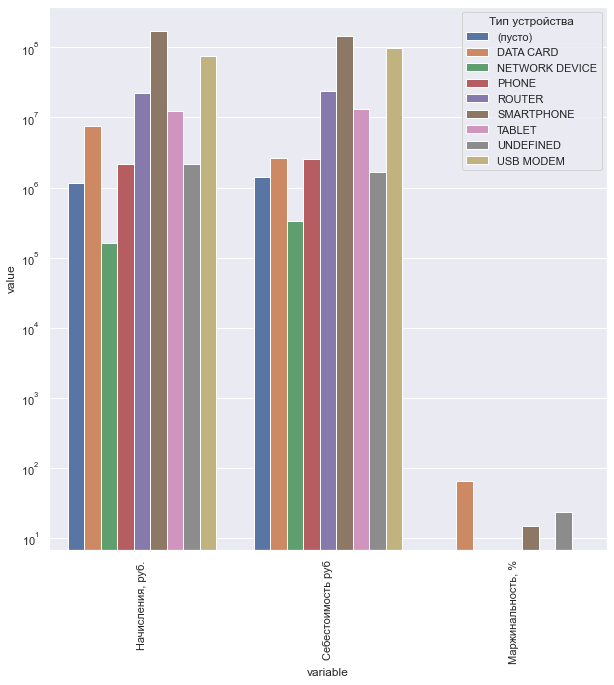

In [43]:
plt.figure(figsize=(10,10))
plt.xticks(rotation=90)
plt.yscale('log')
sns.barplot(data=df_grouped[['Тип устройства','Начисления, руб.', 'Себестоимость руб', 'Маржинальность, %']].melt(id_vars='Тип устройства'), hue='Тип устройства', x='variable', y='value')

Самая низкомаржинальная категория: NETWORK DEVICE

## Решение 2 задания

In [49]:
df1 = pd.read_excel('Тестовое задание B2X+МКД v3.xlsx', sheet_name='Лист1')
df2 = pd.read_excel('Тестовое задание B2X+МКД v3.xlsx', sheet_name="Лист2")

In [53]:
df1 = df1[df1['Сегмент рынка']=='B2B']

In [54]:
df2= df2[df2['Сегмент рынка']=='B2B']

In [65]:
df1_prep = df1.groupby(['Месяц (YYYYMM)', 'Филиал'])['Кол-во активных абонентов на конец периода, шт.'].sum().reset_index()

In [66]:
df2_prep = df2.groupby(['Месяц (YYYYMM)', 'Филиал'])['Выручка, тыс руб., без НДС'].sum().reset_index()

In [78]:
df_merged = pd.merge(df1_prep, df2_prep, on=['Месяц (YYYYMM)', 'Филиал'])
df_merged['Средняя выручка на абонента'] = df_merged['Выручка, тыс руб., без НДС']/df_merged['Кол-во активных абонентов на конец периода, шт.']

In [90]:
df_merged['Месяц (YYYYMM)'] = pd.to_datetime(df_merged['Месяц (YYYYMM)'], format='%Y%m')

# Ответ
Динамика средней выручки на абонента по филиалам

<AxesSubplot:xlabel='Месяц (YYYYMM)', ylabel='Средняя выручка на абонента'>

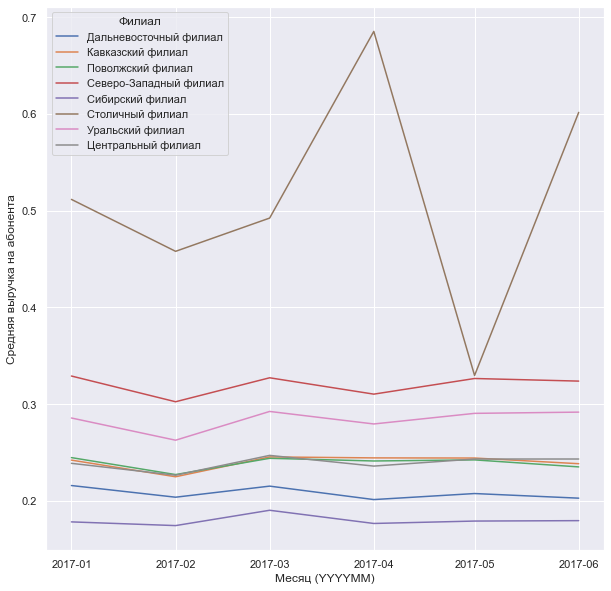

In [94]:
plt.figure(figsize=(10,10))
sns.lineplot(data=df_merged, x='Месяц (YYYYMM)', y='Средняя выручка на абонента', hue='Филиал')

In [92]:
df_merged.sort_values(['Филиал', 'Месяц (YYYYMM)'])

,Месяц (YYYYMM),Филиал,"Кол-во активных абонентов на конец периода, шт.","Выручка, тыс руб., без НДС",Средняя выручка на абонента
0,2017-01-01,Дальневосточный филиал,254648,"54,949.08282299999700626358",0.21578446649099933263
8,2017-02-01,Дальневосточный филиал,258061,"52,572.02699700000084703788",0.20371938028993144543
16,2017-03-01,Дальневосточный филиал,260681,"56,091.21717599999828962609",0.21517186590507170196
24,2017-04-01,Дальневосточный филиал,265230,"53,383.59395100000256206840",0.20127283471326773423
32,2017-05-01,Дальневосточный филиал,262097,"54,386.29566899999917950481",0.20750445701019087918
40,2017-06-01,Дальневосточный филиал,268024,"54,335.72560500000690808520",0.20272709012998837985
1,2017-01-01,Кавказский филиал,371285,"89,872.08033600001363083720",0.24205685749760968983
9,2017-02-01,Кавказский филиал,379709,"85,378.80005099999834783375",0.22485324301241213507
17,2017-03-01,Кавказский филиал,384513,"94,347.06774300000688526779",0.24536769301167973834
25,2017-04-01,Кавказский филиал,379587,"92,760.48798299999907612801",0.24437214125615472349
